# Konvoliuciniai neuroniniai tinklai

- David H. Hubel ir Torsten Wiesel 1958 m. atliko keletą eksperimentų su katėmis, kurie suteikė esminių įžvalgų apie regos žievės struktūrą. 

- Jie parodė, kad daugelis regos žievės neuronų turi mažą vietinį receptorinį lauką, t. y. jie reaguoja tik į ribotoje regos lauko srityje esančius regimuosius dirgiklius.

- Be to, autoriai parodė, kad kai kurie neuronai reaguoja tik į horizontalių linijų vaizdus, o kiti - tik į skirtingų orientacijų linijas (du neuronai gali turėti tą patį recepcinį lauką, bet reaguoti į skirtingų orientacijų linijas).

- Jie taip pat pastebėjo, kad kai kurie neuronai turi didesnius recepcinius laukus ir reaguoja į sudėtingesnius raštus, kurie yra žemesnio lygio raštų deriniai. 

- Visa tai lėmė konvoliucinio neuroninio tinklo architektūros išradimą.

## Konvoliucijos ir koreliacijos operacijos

- Kryžminė koreliacija (angl. cross-correlation) yra dviejų sekų/funkcijų panašumo matas. Koreliacija kaip argumentus paima dvi funkcijas $f$ ir $g$, ir grąžina trečią, kuri, tam tikra prasme, parodo $f$ ir $g$ panašumo lygį.

- Dažniausiai viena funkcija imama kaip fiksuotas filtras, dar vadinamas branduoliu (angl. kernel).

- Diskrečioms vieno kintamojo funkcijoms kryžminės koreliacijos operacija apibrėžiama kaip:

$$
(f \star g)(m) = \sum_{n} f(n) \cdot g(m + n)
$$

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/convolution.gif" alt="correlation" width="65%">
<p><strong>1.12 pav., Koreliacijos operacija </strong></p>
</div>

- Šiek tiek painu: konvoliucija ir koreliacija yra labai panašios operacijos; konvoliucija yra koreliacija su filtru, pasuktu 180 laipsnių.

- Kadangi filtro svoriai nėra fiksuoti, nėra svarbu, ar atliekant operaciją filtrą apversime, ar ne, todėl skaičiavimų prasme, lengviau atlikti koreliacijos operaciją. 

- Taigi, konvoliuciniai neuroniniai tinklai iš tiesų naudoja kryžminę koreliaciją! 


### Koreliacijos operacija taikoma vaizdui

- Vaizdą galima apibrėžti kaip dviejų kintamųjų funkciją $I(x, y)$ – pikselio intensyvumo reikšmė koordinatėse $(x, y)$. Vieno kanalo atveju (nespalvotas vaizdas) $I$ įgyja reikšmes nuo 0 iki 255 (arba kitas normalizuotas diapazonas, pvz., [0, 1]).


- Koreliacija vaizdo apdorojime taikoma naudojant nedidelį filtrą (branduolį) $K$, kuris slysta per visas vaizdos vertes $ I(x, y) $. Kiekviename žingsnyje atliekama skaliarinė sandauga tarp filtro ir atitinkamos vaizdo dalies:

$$
(I \star K)(x, y) = \sum_{i=0}^{f_h-1} \sum_{j=0}^{f_w-1} I(x+i, y+j) \cdot K(i, j)
$$

  - Čia:
    - $ I(x+i, y+j) $ yra įvesties vaizdo reikšmė pozicijoje $ (x+i, y+j) $,
    - $ K(i, j) $ yra filtro (branduolio) reikšmė pozicijoje $ (i, j) $,
    - $ (I * K)(x, y) $ yra išvesties reikšmė pozicijoje $ (x, y) $.

### Koreliacijos operacijos pavyzdys

- Tarkime, turime 3x3 dydžio filtrą (branduolį) $ K $ ir 6x6 dydžio vaizdą $ I $:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/conv_dotprod.png" alt="correlation dot product" width="65%">
<p><strong>1.12 pav., Skaliarinė sandauga tarp vaizdo dalies ir filtro  </strong></p>
</div>

- Koreliacijos operacija pradedama nuo kairiojo viršutinio kampo:

\begin{aligned}
(I \star K)(1, 1) &= (3 \times 1) + (1 \times 0) + (1 \times -1) + \cr
                  &\quad (1 \times 1) + (0 \times 0) + (7 \times -1) + \cr
                  &\quad (2 \times 1) + (3 \times 0) + (5 \times -1) = -7
\end{aligned}


- Šis skaičiavimas kartojamas kiekvienam pikseliui.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt

image = resize(data.camera(), (128, 128))

def show(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(8, 16))
    axs[0].imshow(img1, cmap='gray', vmin=0, vmax=1)
    axs[1].imshow(img2, cmap='gray',  vmin=0, vmax=1)
    [ax.axis('off') for ax in axs]
    plt.show()

### Skirtingų filtrų pavyzdžiai

**Gauso filtras**: 

$$
G = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \cr 2 & 4 & 2 \cr 1 & 2 & 1 \end{bmatrix}
$$

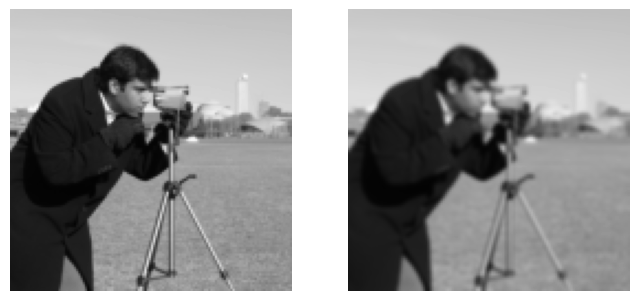

In [2]:
kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

show(image, convolve(image, kernel))

- **Atvirkštinis Laplaso filtras**:

$$
L = \begin{bmatrix} 0 & -1 & 0 \cr -1 & 4 & -1 \cr 0 & -1 & 0 \end{bmatrix}
$$

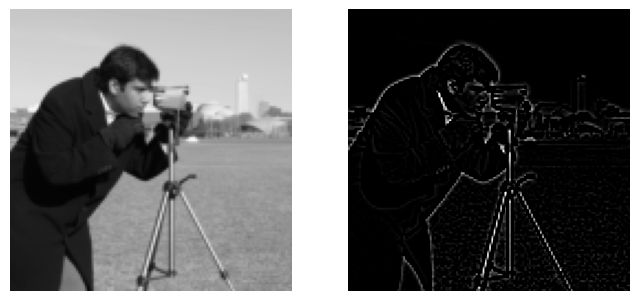

In [3]:
kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

show(image, convolve(image, kernel))

- **Sobelio filtrai**:
$$ 
S_x = \begin{bmatrix} -1 & 0 & 1 \cr -2 & 0 & 2 \cr -1 & 0 & 1 \end{bmatrix}, \quad
S_y = \begin{bmatrix} -1 & -2 & -1 \cr 0 & 0 & 0 \cr 1 & 2 & 1 \end{bmatrix}
$$

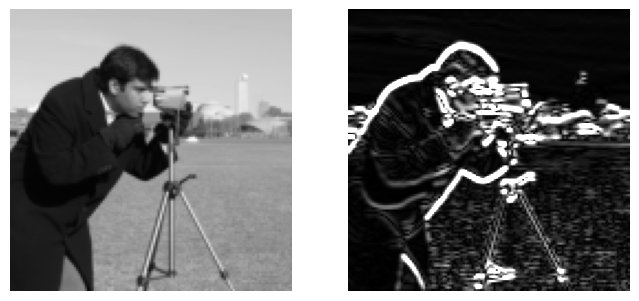

In [4]:
kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

kernel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

show(image, np.sqrt(convolve(image, kernel_x)**2 + convolve(image, kernel_y)**2))


- Konvoliucinio neuroninio tinklo svoriai yra filtro (branduolio) koeficientų reikšmės. Filtrą savotiškai galime galima pavaizduoti kaip mažą receptorinio lauko dydžio paveikslėlį

- Skirtingus svorius naudojantys neuronai ignoruos viską savo recepciniame lauke, išskyrus tam tikras abstrakcijas (pvz., vertikalias linijas), nustatytas filtro svorių.

- Mokymo metu konvoliucinis neuroninis tinklas randa naudingiausius filtrus savo užduočiai atlikti ir išmoksta juos sujungti į sudėtingesnes jų kombinacijas.

## Konvoliucinis sluoksnis

- Svarbiausias struktūrinis blokas yra konvoliucinis sluoksnis – pirmojo konvoliucinio sluoksnio neuronai prijungiami ne prie kiekvieno įvesties vaizdo pikselio (kaip ankstesniuose skyriuose), o tik prie pikselių, esančių jų recepciniame lauke. 
- Savo ruožtu kiekvienas antrojo konvoliucinio sluoksnio neuronas yra sujungtas tik su neuronais, esančiais nedideliame stačiakampyje pirmajame sluoksnyje. 
- Tokia architektūra leidžia tinklui pirmajame paslėptajame sluoksnyje sutelkti dėmesį į žemo lygio požymius, tada kitame paslėptajame sluoksnyje juos surinkti į aukštesnio lygio požymius ir t.t. 
- Tokia hierarchinė struktūra būdinga vaizdo apdorojimui gyvūnų smegenyse.


<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/receptive_field.png" alt="receptive-field" width="65%">
<p><strong>1.12 pav., Konvoliucinių sluoksnių receptinis laukas </strong></p>
</div>

### Nulių pridėjimas (angl. zero-padding)

Tam tikro sluoksnio $i$ eilutėje, $j$ stulpelyje esantis neuronas yra sujungtas su ankstesnio sluoksnio neuronų, esančių nuo $i$ iki $i + f_h - 1$, nuo $j$ iki $j + f_w - 1$ eilutėse, išėjimais, kur $f_h$ ir $f_w$ yra recepcinio lauko aukštis ir plotis. Kad sluoksnis būtų tokio paties aukščio ir pločio kaip ankstesnis sluoksnis, aplink įvesties matricą reikia pridėti nulius. 1.13 pav., $5 \times 7$ įvesties dydžio įvesties sluoksnis papildomas nulių paraštėmis iš visų pusių, kad tolimesnis sluoksnis taip pat būtų $5 \times 7$ dydžio.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/zero_padding.png" alt="zero-padding" width="65%">
<p><strong>1.13 pav., Nulių pridėjimo operacija </strong></p>
</div>

### Konvoliucijos filtro žingsnis (angl. stride)

Didelės rezoliucijos įvesties sluoksniai gali būti sujungti su daug mažesnės rezoliucijos sluoksniu, išdėstant receptorinius laukus su didesniais tarpais tarp jų. Atstumas tarp dviejų vienas po kito einančių recepcinių laukų vadinamas konvoliucijos filtro žingsniu. 1.14 pav. $5 \times 7$ įvesties sluoksnis (plius zero-pad) sujungtas su $3 \times 4$ sluoksniu, naudojant $3 \times 3$ recepcinius laukus ir žingsnį lygų $2$. Viršutinio sluoksnio $i$ eilutėje, $j$ stulpelyje esantis neuronas yra sujungtas su ankstesnio sluoksnio neuronų, esančių nuo $i \times s_h$ iki $i \times s_h + f_h - 1$ eilutėse, $j \times s_w + f_w - 1$ stulpeliuose, išėjimais, kur $s_h$ ir $s_w$ yra žingsnių dydžiai vertikalia ir horizontalia kryptimi.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/stride.png" alt="stride" width="65%">
<p><strong>1.14 pav., Konvoliucijos filtro žingsnis </strong></p>
</div>

### Sutelkimo sluoksnis (angl. max pooling)

- Šių sluoksnių tikslas - sumažinti įvesties vaizdo rezoliuciją, kad būtų sumažinta skaičiavimo apkrova, atminties sąnaudos ir parametrų skaičius.

- Apdorojimas vyksta panašiai kaip ir konvoliuciniuose sluoksniuose.

- Sutelkimo sluoksnio neuronai neturi svorių – viskas, ką jie atlieka, tai apdoroja įvestį, naudodamiesi nustatyta funkcija, pavyzdžiui, maksimalios vertės (angl. max-pooling) arba vidurkio (angl. average-pooling).

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/max_pooling.png" alt="max-pooling" width="65%">
<p><strong>1.14 pav., Sutelkimo pagal maksimalią reikšmę sluoksnis </strong></p>
</div>


### Požymių žemėlapiai 

- Iki šiol kiekvieną konvoliucinį sluoksnį vaizdavome kaip ploną 2D sluoksnį, tačiau iš tikrųjų jį sudaro keli vienodo dydžio požymių žemėlapiai (angl. feature maps), todėl tiksliau yra jį vaizduoti 3D formatu. 

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/multiple_feature_maps.png" alt="feature-maps" width="65%">
<p><strong>1.14 pav., Konvoliuciniai sluoksniai su keliais požymių žemėlapiais </strong></p>
</div>

- Viename požymių žemėlapyje visi neuronai turi tuos pačius parametrus, tačiau skirtingi požymių žemėlapiai gali turėti skirtingus parametrus. 
- Neurono recepcinis laukas apima visų ankstesnių sluoksnių požymių žemėlapius. 

- Konvoliucinis sluoksnis savo įvestims vienu metu taiko kelis filtrus, todėl jis gali aptikti kelis požymius bet kurioje įvesties vietoje.

- Tai, kad visi neuronai požymių žemėlapyje turi tuos pačius parametrus, labai sumažina modelio parametrų skaičių. Svarbiausia tai, kad konvoliucinis neuroninis tinklas, išmokęs atpažinti tam tikrą požymį vienoje vietoje, gali jį atpažinti bet kurioje kitoje vietoje.

Tokiu atveju, konvoliucinio sluoksnio neurono išvestis $I$ taške $(x, y)$ apibrėžiama lygtimi:

$$
(I \star K)(x, y) = b + \sum_{i=0}^{f_h-1} \sum_{j=0}^{f_w-1} \sum_{c=0}^{C-1} I(x + i, y + j, c) \cdot K(i, j, c),
$$

kur $b$ yra laisvasis narys, $C$ – kanalų (požymių žemėlapių gilesniuose sluoksniuose) skaičius.

- Sulyg kiekvienu tinklo sluoksniu, įvesties rezoliucija yra mažinama (naudojant *stride* arba *max pooling*), o kanalų skaičius (*feature maps*) platinamas. Konvoliucinio neuroninio tinklo architektūrą įprasta žymėti tokia schema:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/convnet.png" alt="convolutional-network" width="65%">
<p><strong>1.14 pav., Konvoliucinio neuroninio tinklo architektūra </strong></p>
</div>

- Matome, jog tinklo pabaigoje yra įprastas dirbtinis neuroninis tinklas, žymimas *dense* jungtimis.

Puiki vizualizacija: [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

## Implementacija naudojant PyTorch

In [17]:
import torch
import torch.optim as optim
import torchvision.transforms as T

from torch.utils.data import Dataset, DataLoader
import numpy as np

from torchvision import datasets

In [20]:
def get_FashionMNIST():
    fashion_MNIST_train = datasets.FashionMNIST(root='../data', train=True, download=True)
    fashion_MNIST_val = datasets.FashionMNIST(root='../data', train=False, download=True)

    return fashion_MNIST_train, fashion_MNIST_val

In [91]:
class FashionMNISTDataset(Dataset):
    def __init__(self, data, size=(32, 32), transform=None):
        self.data = data
        self.to_tensor = T.ToTensor()
        self.resize = T.Resize(size)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        image = self.to_tensor(image)
        image = self.resize(image)
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

In [92]:
import torch
import torch.nn as nn


class ConvBlock(nn.Sequential):
    def __init__(self, channels_in, channels_out, activation=True, batch_norm=True, **kwargs):
        layers = [nn.Conv2d(channels_in, channels_out, **kwargs)]
        layers += [nn.BatchNorm2d(channels_out)] if batch_norm else []
        layers += [nn.GELU()] if activation else []
        super().__init__(*layers)


class LinearBlock(nn.Sequential):
    def __init__(self, channels_in, channels_out, activation=True, dropout=0.0, **kwargs):
        layers = [nn.Linear(channels_in, channels_out, **kwargs)]
        layers += [nn.GELU()] if activation else []
        layers += [nn.Dropout(dropout)] if dropout > 0.0 else []
        super().__init__(*layers)


class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        
        self.conv_blocks = nn.Sequential(
            ConvBlock(1, 32, kernel_size=3, padding=1, stride=2),
            ConvBlock(32, 32, kernel_size=3, padding=1, stride=1),
            ConvBlock(32, 64, kernel_size=3, padding=1, stride=2),
            ConvBlock(64, 64, kernel_size=3, padding=1, stride=1),
        )
        
        self.flatten = nn.Flatten()
        
        self.fc_blocks = nn.Sequential(
            LinearBlock(64 * 8 * 8, 256, dropout=0.25),
            LinearBlock(256, 64, dropout=0.25),
            LinearBlock(64, num_classes, activation=False)
        )
    
    def forward(self, x):
        x = self.conv_blocks(x)
        x = self.flatten(x)
        x = self.fc_blocks(x)
        return x

In [93]:
import matplotlib.pyplot as plt 

def visualize_data(dataset, idx=None):
    idx = idx or np.random.randint(0, len(dataset)-1)
    img, label = dataset[idx]

    img = img.permute(1, 2, 0).numpy()
    class_names = dataset.data.classes

    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Class {label}: {class_names[label]}')
    ax.axis('off')
    plt.show()

In [106]:
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=100):
    model.to(device)
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
        
    for epoch in range(num_epochs):
        model.train()
        running_loss_train = running_loss_val = 0.0
        correct_train = total_train = 0
        correct_val = total_val = 0

        for inputs_train, labels_train in tqdm(train_loader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False):
            inputs_train, labels_train = inputs_train.to(device), labels_train.to(device)
            
            outputs_train = model(inputs_train)
            loss_train = criterion(outputs_train, labels_train)
            
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            
            running_loss_train += loss_train.item()
            
            _, predicted_train = torch.max(outputs_train, 1)
            total_train += len(labels_train)
            correct_train += (predicted_train == labels_train).sum().item()
                
        train_losses.append(running_loss_train / len(train_loader))
        train_accuracies.append(100 * correct_train / total_train)
        
        with torch.no_grad():
            model.eval()
            for inputs_val, labels_val in tqdm(val_loader, desc='Validation', leave=False):
                inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)

                outputs_val = model(inputs_val)
                loss_val = criterion(outputs_val, labels_val)
                
                running_loss_val += loss_val.item()
        
                _, predicted_val = torch.max(outputs_val, 1)
                total_val += len(labels_val)
                correct_val += (predicted_val == labels_val).sum().item()

            val_losses.append(running_loss_val / len(val_loader))
            val_accuracies.append(100 * correct_val / total_val)
        
    return [train_losses, val_losses], [train_accuracies, val_accuracies]

In [107]:
def plot_metrics(num_epochs, losses, accuracies):
    train_losses, val_losses = losses
    train_accuracies, val_accuracies = accuracies
    
    epochs = list(range(1, num_epochs + 1))

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    axs[0].plot(epochs, train_losses, label='Training Loss')
    axs[0].plot(epochs, val_losses, color='#FF5B00', label='Validation Loss')
    axs[0].set_title('Training and Validation Loss Over Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_yscale('log')

    axs[1].plot(epochs, train_accuracies, label='Training Accuracy')
    axs[1].plot(epochs, val_accuracies, color='#FF5B00', label='Validation Accuracy')
    axs[1].set_title('Training and Validation Accuracy Over Epochs')
    axs[1].set_ylabel('Accuracy (%)')

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.legend()
        ax.grid()

    plt.show()

In [108]:
NUM_CLASSES = 10

IMAGE_SIZE = (32, 32)
BATCH_SIZE = 64

LEARNING_RATE = 0.001
NUM_EPOCHS = 100
DEVICE = 'mps'

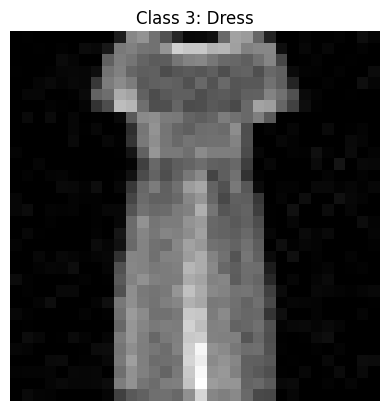

In [109]:
train_data, val_data = get_FashionMNIST()

train_dataset = FashionMNISTDataset(train_data, size=IMAGE_SIZE)
val_dataset = FashionMNISTDataset(val_data, size=IMAGE_SIZE)

visualize_data(train_dataset)

In [110]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

loader_iter = iter(train_loader)
batch = next(loader_iter)
print(f'Batch of images: {batch[0].shape}; Batch of labels: {batch[1].shape}')

Batch of images: torch.Size([64, 1, 32, 32]); Batch of labels: torch.Size([64])


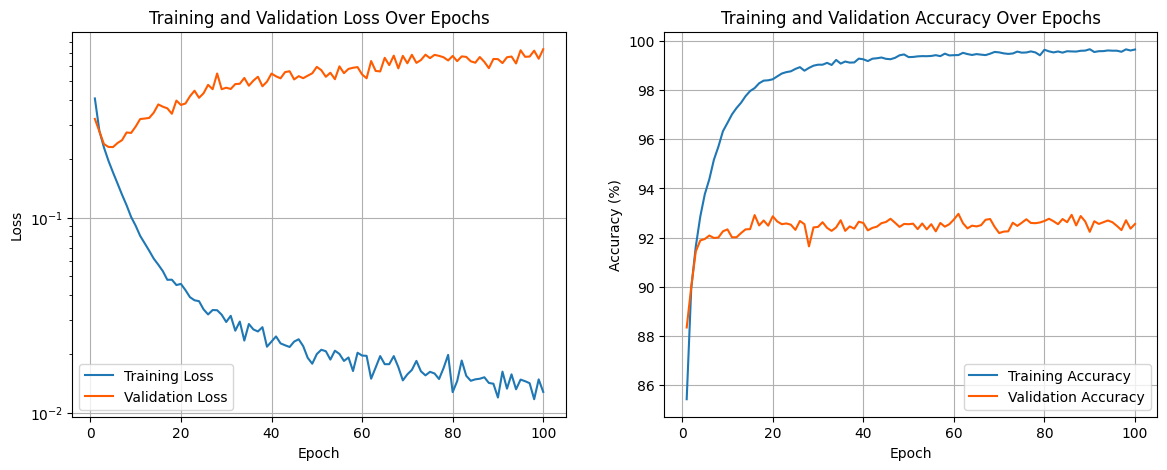

In [111]:
device = torch.device(DEVICE)

model = CNN(num_classes=NUM_CLASSES)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

losses, accuracies = train_model(model, train_loader, val_loader, 
                                 criterion, optimizer, device, 
                                 num_epochs=NUM_EPOCHS)

plot_metrics(NUM_EPOCHS, losses, accuracies)

In [ ]:
def visualize_predictions(model, data_loader, classes, device):
    model.eval()
    
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
    
    images = images.cpu()
    preds = preds.cpu()
    labels = labels.cpu()
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(min(len(images), 16)):
        ax = fig.add_subplot(4, 4, i+1)
        img = images[i].permute(1, 2, 0).numpy()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        ax.set_title(f"Pred: {classes[preds[i]]}\nActual: {classes[labels[i]]}", 
                     color=("green" if preds[i] == labels[i] else "red"))
    plt.show()
    
classes = train_dataset.data.classes
visualize_predictions(model, val_loader, classes, device)

## Praktinė užduotis

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from quickdraw import QuickDrawDataGroup

def load_quickdraw_data(classes, image_size, val_split=0.25, max_drawings_per_class=1000):

    images = []
    labels = []
    label_dict = {cls: idx for idx, cls in enumerate(classes)}

    for cls in classes:
        qdg = QuickDrawDataGroup(cls, max_drawings=max_drawings_per_class)
        for drawing in qdg.drawings:
            image = drawing.get_image().convert('L')
            image = image.resize(image_size)
            image_array = np.array(image)
            image_array = 255 - image_array
            images.append(image_array)
            labels.append(label_dict[cls])

    X = np.array(images)
    y = np.array(labels)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_split, stratify=y, random_state=42)
    
    return (X_train, y_train), (X_val, y_val)


CLASSES = [
    "cat",
    "dog",
    "bicycle",
    "airplane",
    "tree",
    "house",
    "flower",
    "fish",
    "car",
    "apple"
]

train_data, val_data = load_quickdraw_data(CLASSES, image_size=(128, 128), val_split=0.2, max_drawings_per_class=1000)

loading cat drawings
load complete
loading dog drawings
load complete
loading bicycle drawings
load complete
loading airplane drawings
load complete
loading tree drawings
load complete
loading house drawings
load complete
loading flower drawings
load complete
loading fish drawings
load complete
loading car drawings
load complete
loading apple drawings
load complete


In [102]:
import matplotlib.pyplot as plt 

def visualize_data(dataset, idx=None):
    idx = idx or np.random.randint(0, len(dataset)-1)
    img, label = dataset[idx]

    img = img.permute(1, 2, 0).numpy()

    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Class {label}: {dataset.classes[label]}')
    ax.axis('off')
    plt.show()

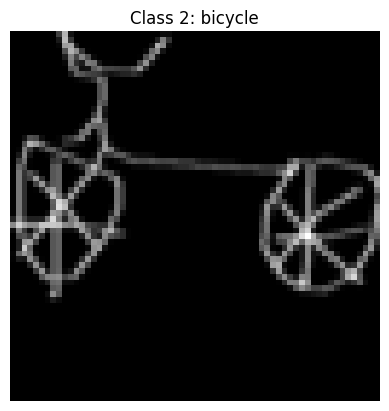

In [103]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T


class DoodlesDataset(Dataset):
    def __init__(self, data, image_size=None, transform=None):
        self.classes = CLASSES
        
        self.images, self.labels = data
        self.resize = T.Resize(image_size) if image_size else None
        self.to_tensor = T.ToTensor()
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        image = self.to_tensor(image)
        
        if self.resize:
            image = self.resize(image)
            
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[idx]
        
        return image, label


# Example usage
dataset = DoodlesDataset(train_data, image_size=(64, 64))
visualize_data(dataset)

In [186]:
import torch
import torch.nn as nn


class ConvBlock(nn.Sequential):
    def __init__(self, channels_in, channels_out, activation=True, batch_norm=True, **kwargs):
        layers = [nn.Conv2d(channels_in, channels_out, **kwargs)]
        layers += [nn.BatchNorm2d(channels_out)] if batch_norm else []
        layers += [nn.GELU()] if activation else []
        super().__init__(*layers)


class LinearBlock(nn.Sequential):
    def __init__(self, channels_in, channels_out, activation=True, dropout=0.0, **kwargs):
        layers = [nn.Linear(channels_in, channels_out, **kwargs)]
        layers += [nn.GELU()] if activation else []
        layers += [nn.Dropout(dropout)] if dropout > 0.0 else []
        super().__init__(*layers)


class DoodlesClassifier(nn.Module):
    def __init__(self, image_size, channels_in, hidden_layers, num_classes):
        super().__init__()
        self.image_size = image_size
        self.channels_in = channels_in
        self.hidden_layers = hidden_layers
        self.num_classes = num_classes
        
        conv_layers = []
        
        for i, channels_out in enumerate(hidden_layers):
            stride = 2 if i == 0 or hidden_layers[i] != hidden_layers[i-1] else 1
            conv_layers.append(
                ConvBlock(channels_in, channels_out, kernel_size=3, padding=1, stride=stride)
            )
            channels_in = channels_out
        
        self.conv_blocks = nn.Sequential(*conv_layers)

        self.flatten = nn.Flatten()
    
        conv_output_size = self._get_conv_output_size(*image_size)
        
        self.fc_blocks = nn.Sequential(
            LinearBlock(conv_output_size, 64, dropout=0.5),
            LinearBlock(64, num_classes, activation=False)
        )
        
    @torch.no_grad()
    def _get_conv_output_size(self, height, width):
        self.eval()
        dummy_input = torch.zeros(1, 1, height, width)
        output = self.conv_blocks(dummy_input)
        self.train()
        return output.numel()
    
    def forward(self, x):
        x = self.conv_blocks(x)
        x = self.flatten(x)
        x = self.fc_blocks(x)
        return x
    
    
# Example usage
model = DoodlesClassifier(image_size=(64, 64), channels_in=1, hidden_layers=[32, 64, 128], num_classes=3)
inp = torch.rand(size=(1, 1, 64, 64), dtype=torch.float32)
out = model(inp)

print(inp.shape)
print(out.shape)

torch.Size([1, 1, 64, 64])
torch.Size([1, 3])


In [187]:
from tqdm import tqdm
import torch.nn.functional as F


def train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=100):
    model.to(device)
    
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
        
    for epoch in range(num_epochs):
        model.train()
        running_loss_train = running_loss_val = 0.0
        correct_train = total_train = 0
        correct_val = total_val = 0

        for inputs_train, labels_train in tqdm(train_loader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False):
            inputs_train, labels_train = inputs_train.to(device), labels_train.to(device)
            
            outputs_train = model(inputs_train)
            loss_train = criterion(outputs_train, labels_train)
            
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            
            running_loss_train += loss_train.item()
            
            probs_train = F.softmax(outputs_train, dim=1)
            predicted_train = torch.argmax(probs_train, dim=1)

            total_train += len(labels_train)
            correct_train += (predicted_train == labels_train).sum().item()
                
        train_losses.append(running_loss_train / len(train_loader))
        train_accuracies.append(100 * correct_train / total_train)
        
        with torch.no_grad():
            model.eval()
            for inputs_val, labels_val in tqdm(val_loader, desc='Validation', leave=False):
                inputs_val, labels_val = inputs_val.to(device), labels_val.to(device)

                outputs_val = model(inputs_val)
                loss_val = criterion(outputs_val, labels_val)
                
                running_loss_val += loss_val.item()
        
                probs_val = F.softmax(outputs_val, dim=1)
                predicted_val = torch.argmax(probs_val, dim=1)
                
                total_val += len(labels_val)
                correct_val += (predicted_val == labels_val).sum().item()

            val_losses.append(running_loss_val / len(val_loader))
            val_accuracies.append(100 * correct_val / total_val)
        
    return [train_losses, val_losses], [train_accuracies, val_accuracies]

In [188]:
def plot_metrics(num_epochs, losses, accuracies):
    train_losses, val_losses = losses
    train_accuracies, val_accuracies = accuracies
    
    epochs = list(range(1, num_epochs + 1))

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    axs[0].plot(epochs, train_losses, label='Training Loss')
    axs[0].plot(epochs, val_losses, color='#FF5B00', label='Validation Loss')
    axs[0].set_title('Training and Validation Loss Over Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_yscale('log')

    axs[1].plot(epochs, train_accuracies, label='Training Accuracy')
    axs[1].plot(epochs, val_accuracies, color='#FF5B00', label='Validation Accuracy')
    axs[1].set_title('Training and Validation Accuracy Over Epochs')
    axs[1].set_ylabel('Accuracy (%)')

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.legend()
        ax.grid()

    plt.show()

In [189]:
IMAGE_SIZE = (64, 64)
CHANNELS_IN = 1
HIDDEN_LAYERS = [16, 32, 64, 128]
NUM_CLASSES = len(CLASSES)

BATCH_SIZE = 64

LEARNING_RATE = 3e-4
NUM_EPOCHS = 20
DEVICE = 'mps'

In [190]:
class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.1):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        return tensor + noise

In [191]:
transform = T.Compose([
    T.RandomRotation(degrees=15),
    T.RandomHorizontalFlip(),
    T.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    T.RandomErasing(p=0.5, scale=(0.02, 0.2)),
    AddGaussianNoise(mean=0., std=0.01),
])

train_dataset = DoodlesDataset(train_data, image_size=IMAGE_SIZE, transform=transform)
val_dataset = DoodlesDataset(val_data, image_size=IMAGE_SIZE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

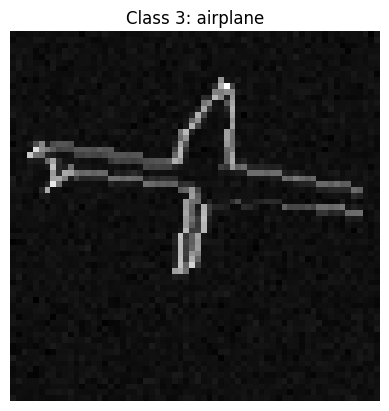

In [192]:
visualize_data(train_dataset)

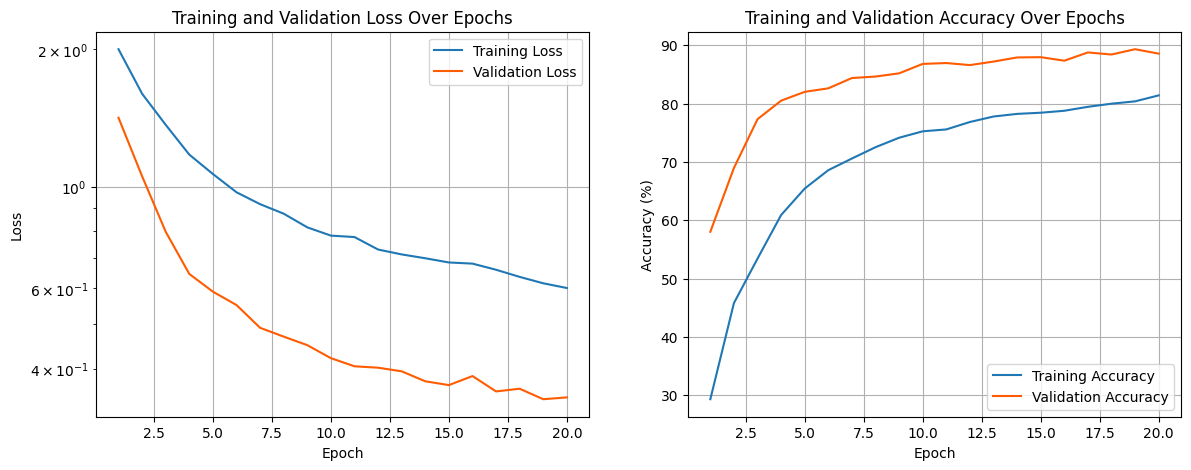

In [193]:
import torch.optim as optim

device = torch.device(DEVICE)

model = DoodlesClassifier(IMAGE_SIZE, CHANNELS_IN, HIDDEN_LAYERS, NUM_CLASSES)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

losses, accuracies = train_model(model, train_loader, val_loader, 
                                 criterion, optimizer, device, 
                                 num_epochs=NUM_EPOCHS)

plot_metrics(NUM_EPOCHS, losses, accuracies)

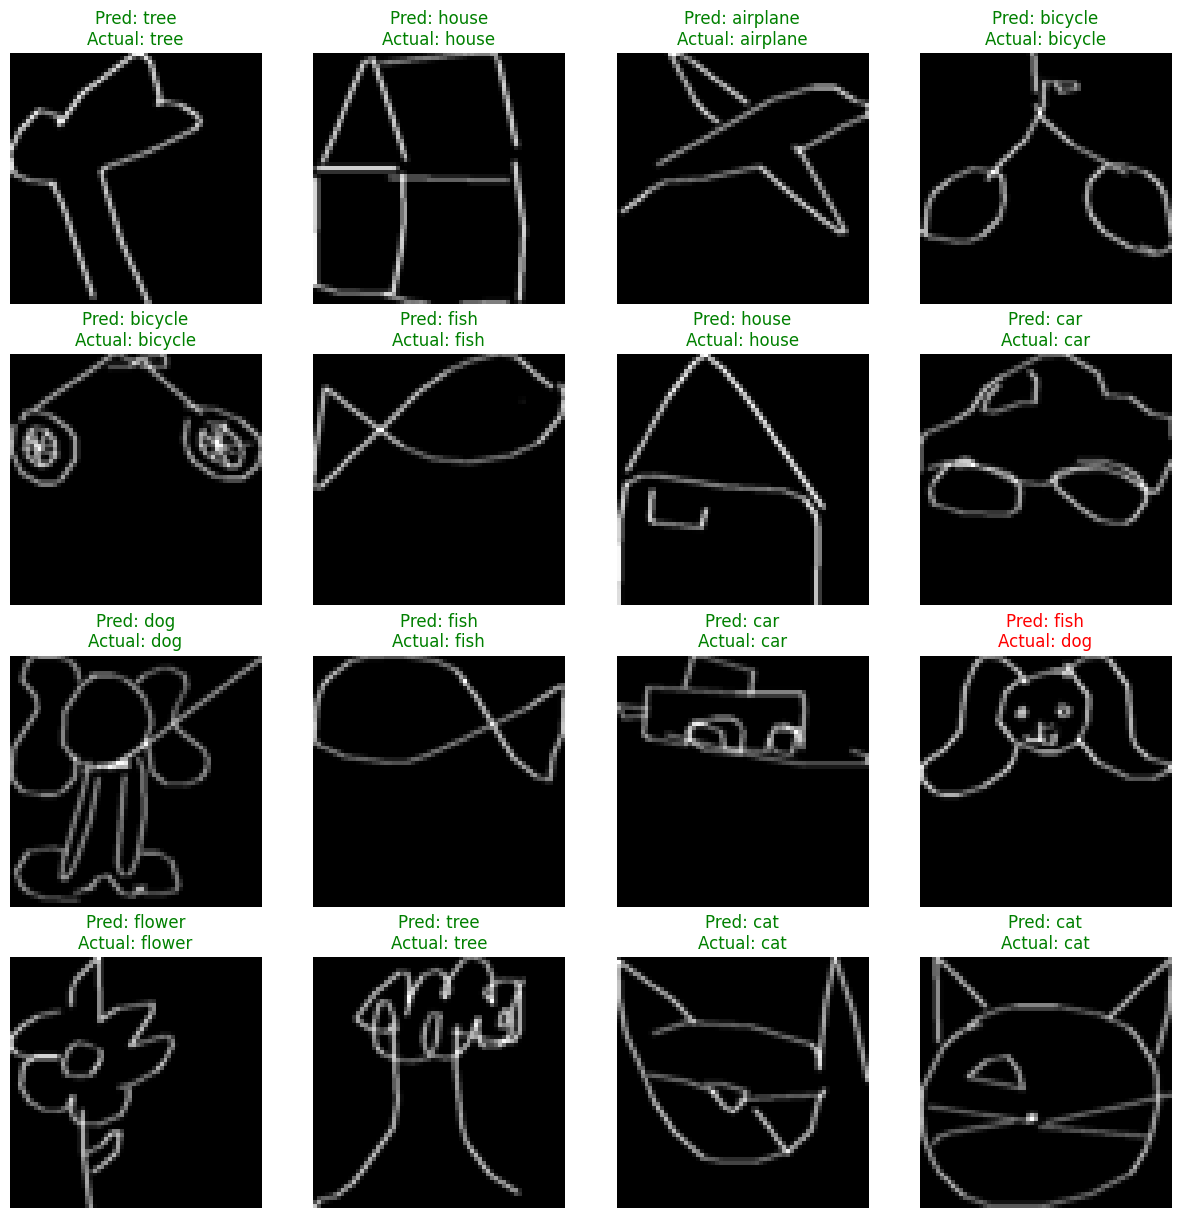

In [194]:
def visualize_predictions(model, data_loader, classes, device):
    model.eval()
    
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)
    
    with torch.no_grad():
        logits = model(images)
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

    images = images.cpu()
    preds = preds.cpu()
    labels = labels.cpu()
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(min(len(images), 16)):
        ax = fig.add_subplot(4, 4, i+1)
        img = images[i].permute(1, 2, 0).numpy()
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        ax.set_title(f"Pred: {classes[preds[i]]}\nActual: {classes[labels[i]]}", 
                     color=("green" if preds[i] == labels[i] else "red"))
    plt.show()
    
classes = train_dataset.classes
visualize_predictions(model, val_loader, classes, device)

In [230]:
import torch
import torch.nn.functional as F
from ipycanvas import Canvas
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

canvas = Canvas(width=350, height=350, sync_image_data=True)
canvas.stroke_style = 'black'
canvas.line_width = 5

drawing = False

def clear_canvas(_):
    canvas.clear()

def start_drawing(x, y):
    global drawing
    drawing = True
    canvas.begin_path()
    canvas.move_to(x, y)

def draw(x, y):
    if drawing:
        canvas.line_to(x, y)
        canvas.stroke()

def stop_drawing(x, y):
    global drawing
    drawing = False

canvas.on_mouse_down(start_drawing)
canvas.on_mouse_move(draw)
canvas.on_mouse_up(stop_drawing)
canvas.on_mouse_out(stop_drawing)

def preprocess_canvas(canvas):
    image_data = np.array(canvas.get_image_data())
    image_data = image_data[..., 3]
    image_data = image_data.astype(np.float32) / 255.0
    image_tensor = torch.tensor(image_data).unsqueeze(0).unsqueeze(0)
    image_tensor = F.interpolate(image_tensor, size=model.image_size, mode='bilinear', align_corners=False)
    return image_tensor

def predict_doodle(_):
    image_tensor = preprocess_canvas(canvas)
    image_tensor = image_tensor.to(DEVICE)

    model.eval()
    with torch.no_grad():
        logits = model(image_tensor)
        probs = F.softmax(logits, dim=1)
        probs = probs.cpu()

    top5_probs, top5_indices = torch.topk(probs, 5)
    top5_probs = top5_probs.numpy()
    top5_indices = top5_indices.numpy()

    with image_output:
        clear_output(wait=True)
        
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.imshow(image_tensor.squeeze().cpu().numpy(), cmap='gray')
        ax.axis('off')
        plt.show()

    with prediction_output:
        clear_output(wait=True)
        predictions_html = "<div style='border-radius: 10px; background-color: #f0f0f0; padding: 5px; margin: 5px; border: 1px solid #ccc;'>"
        for i in range(5):
            prob_text = f"{CLASSES[top5_indices[0][i]]}: {top5_probs[0][i] * 100:.2f}%"
            predictions_html += f"<div style='margin: 2px 0; width: 250px'>{prob_text}</div>"
            predictions_html += f"<hr style='border: none; height: 2px; background-color: gray;'>"
        predictions_html += "</div>"
        
        display(widgets.HTML(predictions_html))

clear_button = widgets.Button(
    description="Clear Canvas", 
    layout=widgets.Layout(
        border_radius='12px', 
        padding='10px 20px', 
        margin='5px', 
        height='40px', 
        align_items='center', 
        justify_content='center'
    )
)
predict_button = widgets.Button(
    description="Predict Doodle", 
    layout=widgets.Layout(
        border_radius='12px', 
        padding='10px 20px', 
        margin='5px', 
        height='40px', 
        align_items='center', 
        justify_content='center'
    )
)

clear_button.on_click(clear_canvas)
predict_button.on_click(predict_doodle)

button_box = widgets.HBox(
    [clear_button, predict_button], 
    layout=widgets.Layout(justify_content='center', margin='10px 0')
)

image_output = widgets.Output()
prediction_output = widgets.Output()

canvas_title = widgets.HTML("<div style='text-align: center; font-weight: bold;'>Drawing Canvas</div>")
image_title = widgets.HTML("<div style='text-align: center; font-weight: bold;'>Image for Prediction</div>")
prediction_title = widgets.HTML("<div style='text-align: center; font-weight: bold;'>Top 5 Predictions</div>")

layout = widgets.HBox([
    widgets.VBox([canvas_title, canvas]),
    widgets.VBox([image_title, image_output]),
    widgets.VBox([prediction_title, prediction_output])
])

display(widgets.VBox([layout, button_box], layout=widgets.Layout(align_items='center')))
